# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Your code here
boston = pd.read_csv('../data/boston_data.csv')

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


I found the following insights in *kaggle* to understand this housing dataset:
- crim: crime rate
- zn: proportion of residential land (lots > 25k $ft^2$
- indus: proportion of non-retail bussines acres
- chas: border with River Charls (0 no border)
- nox: NO concentration (pp $10e^6$)
- rm: average rooms
- age: proportion of owner-occupied units (built prior to 1940)
- dis: weighted distances to Boston employment centres
- rad: index of accessibility to radial highways
- tax: property tax per 10k
- ptratio: pupil-teacher ratio
- black: WTF!!! --> $1000(Bk - 0.63)^2$ where $Bk$ is proportion of blacks
- lstat: % lower status population
- medv: median value of owner-occupied homes in $1000's

Below we observe two colums with high proportion of zero's:

In [5]:
zero_zn = boston.zn.value_counts()[0.0]
n_rows  = boston.shape[0]
print(f"Column zn has {round(zero_zn/n_rows*100,2)}% of zero entries, thus I'll discard the column.")
zero_chas = boston.chas.value_counts()[0.0]
print(f"Column chas has {round(zero_chas/n_rows*100,2)}% of zero entries, thus I'll discard the column.")
boston_clean = boston.drop(columns=['zn','chas'])

Column zn has 74.26% of zero entries, thus I'll discard the column.
Column chas has 93.07% of zero entries, thus I'll discard the column.


In [6]:
# describe the numericals
boston_clean.describe()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,11.189901,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,6.814909,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.460000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,5.190000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,9.795000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,18.100000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,27.740000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

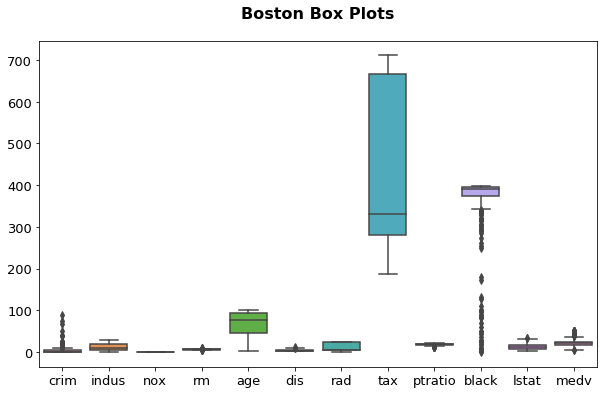

In [7]:
# plot the box plots
plt.figure(figsize=(10,6))
plt.title('Boston Box Plots', size=16, weight='bold',y=1.05)
sns.boxplot(data=boston_clean)
 
# tune matplotlib
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

In [8]:
# Assess the proportion of outliers per columns based on the IQR
Q1 = boston_clean.quantile(0.25)
Q3 = boston_clean.quantile(0.75)
IQR = Q3 - Q1
low_Q1  = boston_clean < (Q1 - 1.5 * IQR)
high_Q3 = boston_clean > (Q3 + 1.5 * IQR)
out_ratio = ((low_Q1|high_Q3).sum()/n_rows*100).round(2)
print(f"The ratio [%] of outliers per column is:\n{out_ratio},\nusing the IQR criteria.")

The ratio [%] of outliers per column is:
crim       10.40
indus       0.00
nox         0.00
rm          5.20
age         0.00
dis         1.24
rad         0.00
tax         0.00
ptratio     2.97
black      15.10
lstat       0.50
medv        6.68
dtype: float64,
using the IQR criteria.


In [9]:
# Assess the proportion of outliers per columns based on the z score
z_abs = np.abs(stats.zscore(boston_clean))
out_ratio = pd.Series(data=((z_abs>3).sum(axis=0)/n_rows*100).round(2), index=IQR.index)
print(f"The ratio [%] of outliers per column is:\n{out_ratio},\nusing the Z-Score criteria.")

The ratio [%] of outliers per column is:
crim       1.73
indus      0.00
nox        0.00
rm         1.73
age        0.00
dis        1.24
rad        0.00
tax        0.00
ptratio    0.00
black      5.20
lstat      0.50
medv       2.97
dtype: float64,
using the Z-Score criteria.


In [10]:
# Based on the Z-Score, I will keep only records below 3 (in absolute value)
boston_clean_out = boston_clean[(z_abs<3).all(axis=1)]
cut_ratio = (len(boston_clean) - len(boston_clean_out))/len(boston_clean)*100
print(f"Based on Z-Score, {round(cut_ratio,2)}% of the original rows have been droped (containing at least one outlier).")
boston_clean_out.describe()

Based on Z-Score, 11.63% of the original rows have been droped (containing at least one outlier).


,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.362575,10.791625,0.549025,6.277728,67.258824,3.888775,8.795518,393.330532,18.374230,373.461905,12.347059,22.134454
std,4.553362,6.702214,0.116303,0.574792,28.091076,1.967221,8.240772,161.920852,2.105959,55.362369,6.460672,7.142873
min,0.006320,0.740000,0.392000,4.368000,2.900000,1.316300,1.000000,188.000000,12.600000,81.330000,1.980000,5.600000
25%,0.079780,5.190000,0.449000,5.914000,45.100000,2.211000,4.000000,279.000000,17.000000,378.380000,7.220000,17.800000
50%,0.210380,8.560000,0.520000,6.229000,73.400000,3.410600,5.000000,311.000000,18.700000,392.300000,11.120000,21.700000
75%,2.313900,18.100000,0.609000,6.593000,93.500000,5.400700,8.000000,437.000000,20.200000,396.900000,16.220000,24.800000
max,25.940600,27.740000,0.871000,8.266000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,48.300000


### Next, we want to explore the data. Pick several varibables you think will be cost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

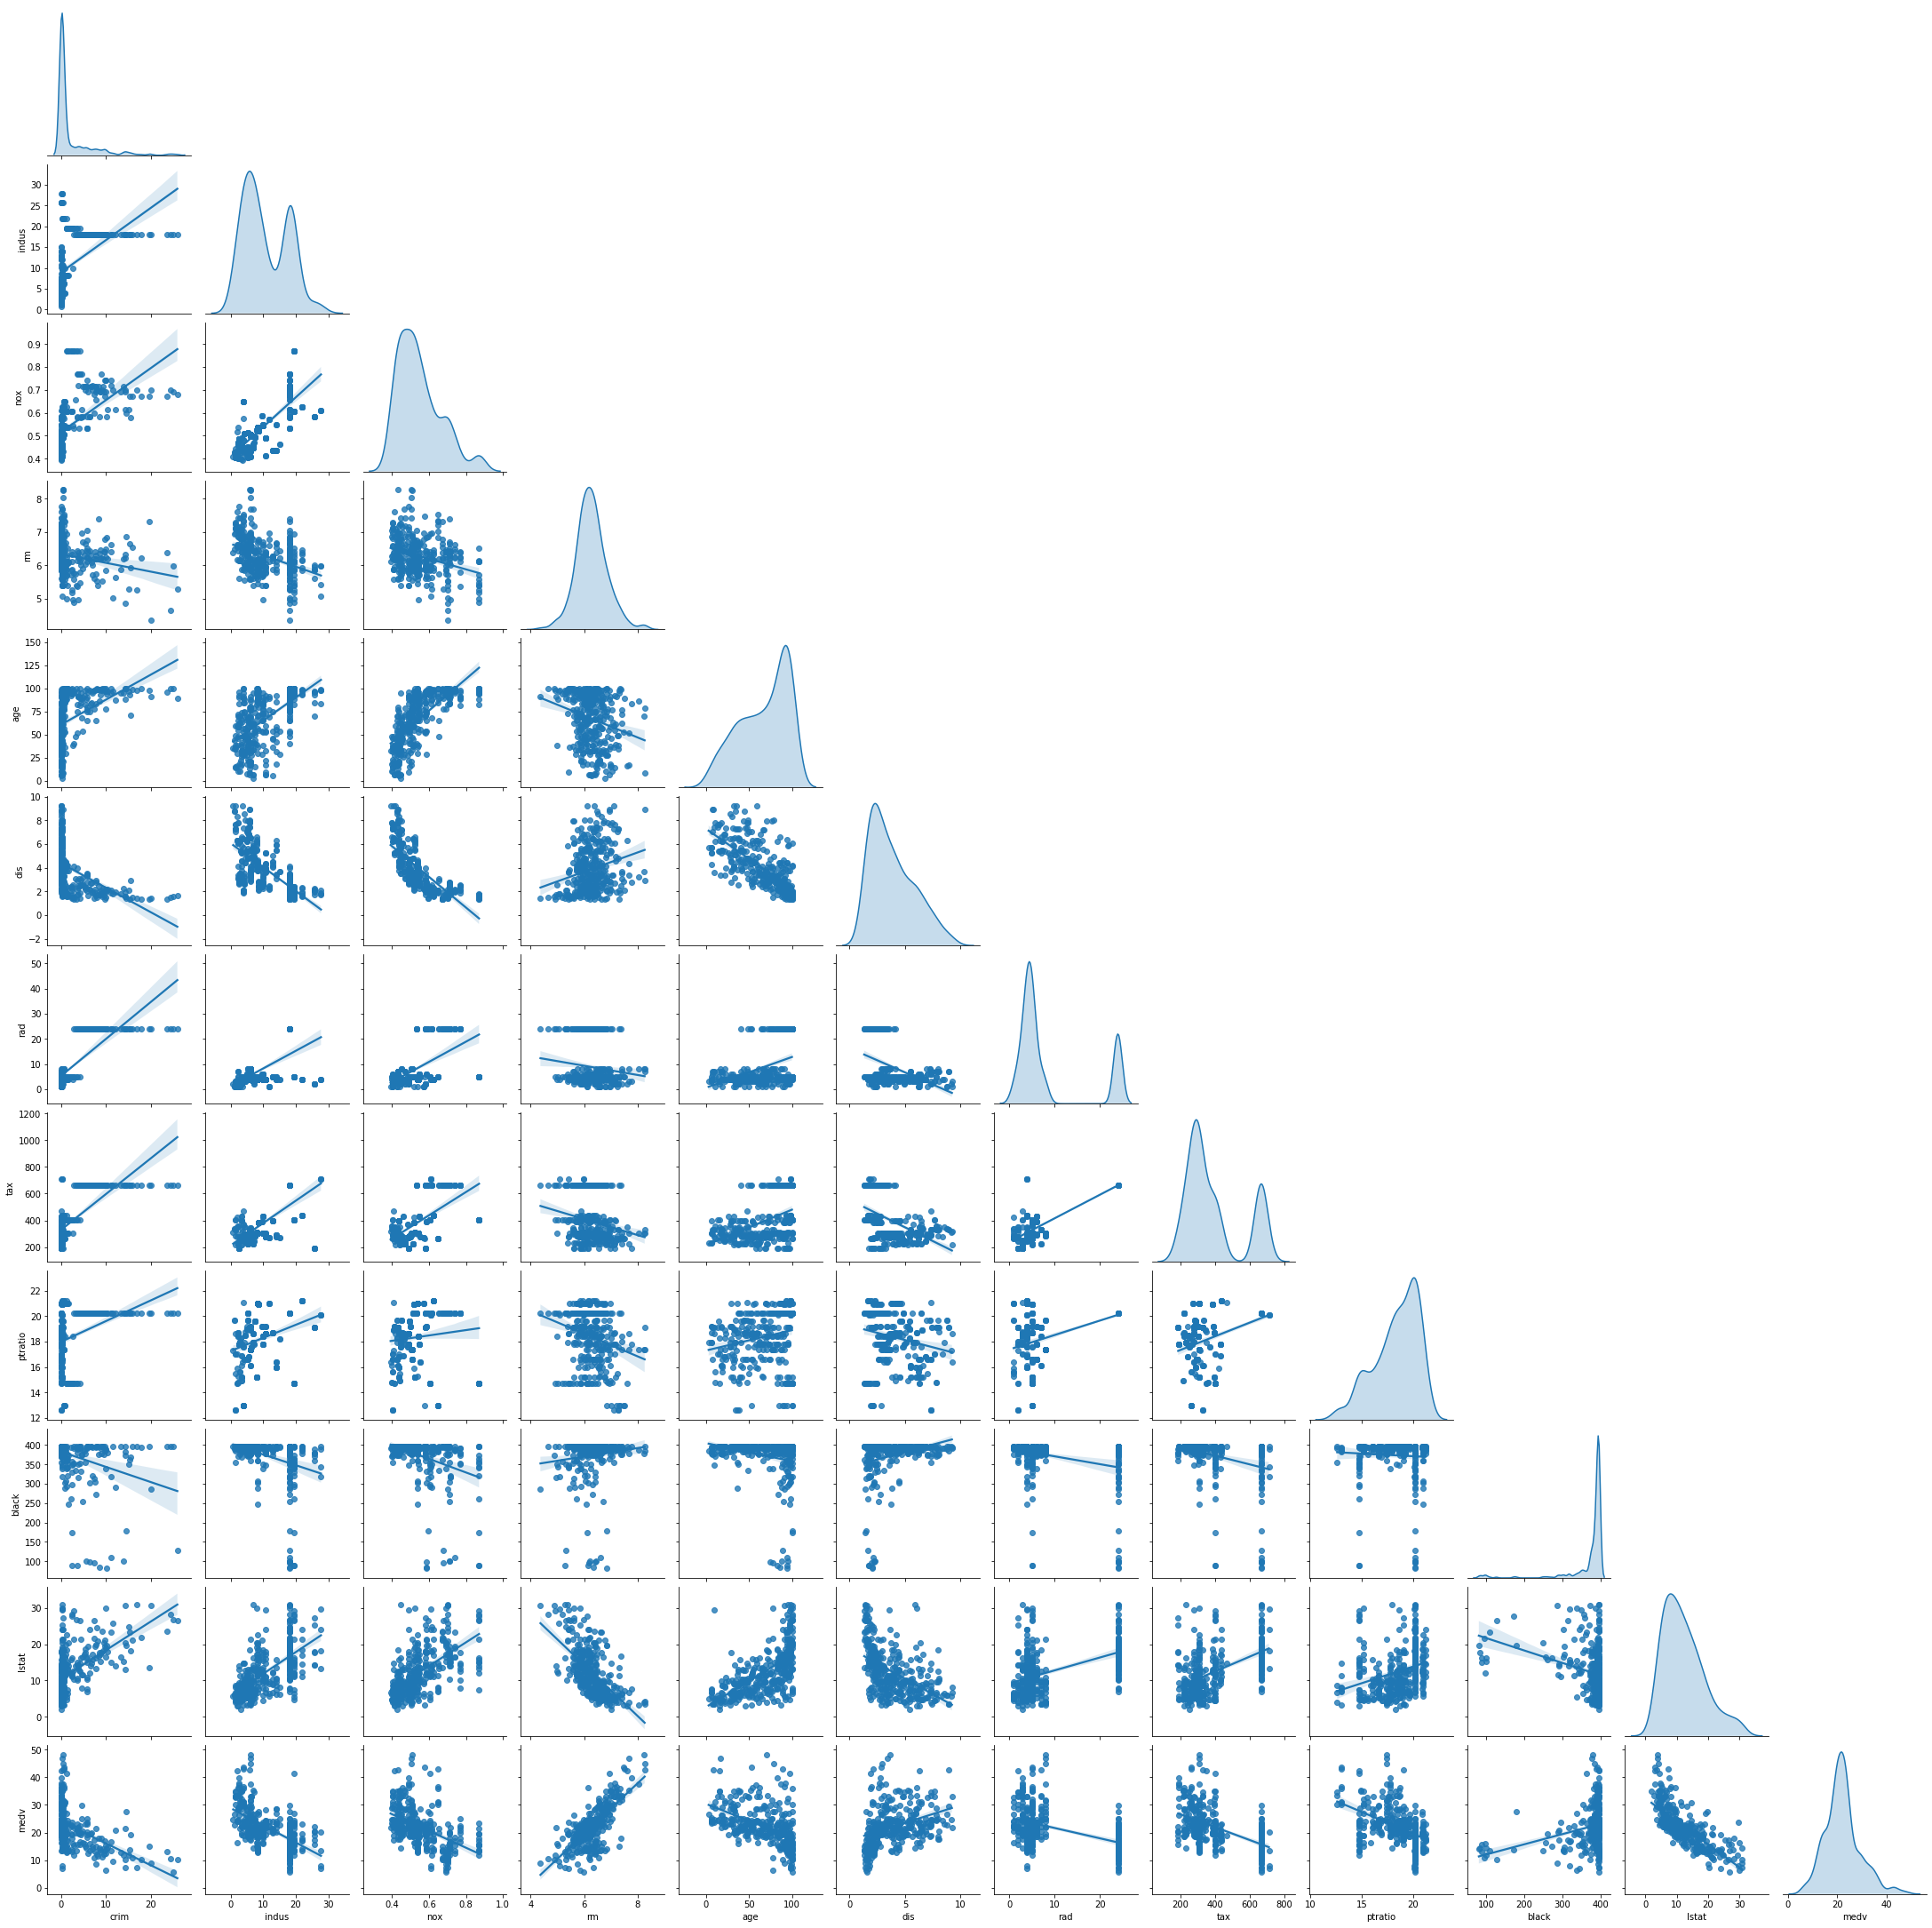

In [11]:
# Your plots here
# vars=['crim','indus','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
sns.pairplot(data = boston_clean_out,kind='reg',diag_kind='kde',corner=True)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

The graphs show in general the expected relations. It is observed that:
- 'rm' (rooms) and 'lstat' (lower status) show the strongest correlation against prices of homes in Boston (positive and negative respectively).
- The proportion of non-retail bussiness (industries) shows collinearity with polution (NOx), both affecting negatively the house prices.
- The percentage of crime is mostly low in Boston areas, and do not affect housing prices at these low rates. However, in the fewests areas with higher crime rates the housing prices do fall down.
- Other variables that would typically influence the price would need further analysis, e.g: age, tax and 'pupil-teacher ratio'.
- Variables 'dis' and 'rad' don't show a strong correlation with price and their regression lines don't trend as expected (larger distance to employment centers trend to higher prices and higher indexes of accessibility to highways trend to lower prices).

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

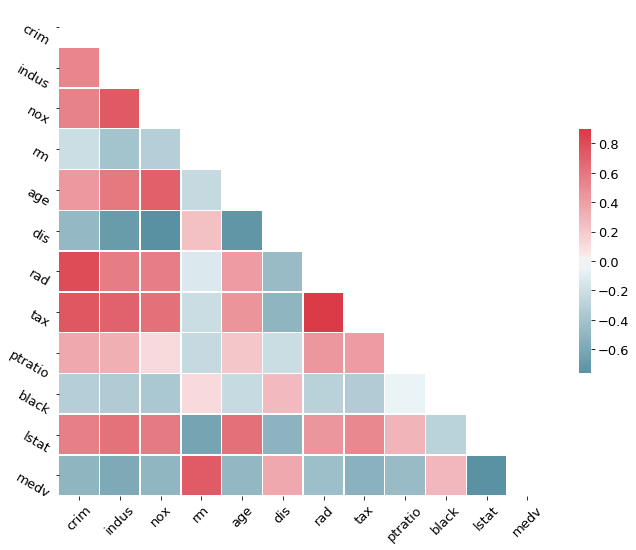

In [12]:
# Your response here
# Compute the correlation matrix
corr = boston_clean_out.corr()

max_corr = np.triu(corr,k=1).max()
min_corr = np.triu(corr,k=1).min()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=max_corr , vmin=min_corr, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=13,rotation=-30)
# use matplotlib.colorbar.Colorbar object
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=13)

In [13]:
# print correlation coefficients of interest
print(f"These are the correlations against housing prices (sorted ascending):\n{corr.medv.sort_values()}")

These are the correlations against housing prices (sorted ascending):
lstat     -0.754996
indus     -0.582936
tax       -0.527844
crim      -0.503819
nox       -0.493404
age       -0.481100
ptratio   -0.464899
rad       -0.430991
black      0.285274
dis        0.349549
rm         0.733071
medv       1.000000
Name: medv, dtype: float64


The heat map confirms the strongest correlations against housing prices, begin top three: lower status (neg), rooms (pos) and indus (neg). In addition, I would also consider tax and crime, having both negative correlations above 0.5 (absolute value).

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

Descriptive statistics for housing price:
count    357.000000
mean      22.134454
std        7.142873
min        5.600000
25%       17.800000
50%       21.700000
75%       24.800000
max       48.300000
Name: medv, dtype: float64


Text(0.5, 0, "Housing Prices [$1000's]")

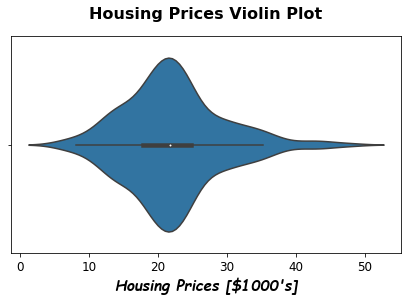

In [14]:
# Your code here
print(f"Descriptive statistics for housing price:\n{boston_clean_out.medv.describe()}")
# Violin plot housing price
plt.figure(figsize=(7,4))
plt.title('Housing Prices Violin Plot', size=16, weight='bold',y=1.05)
sns.violinplot(boston_clean_out.medv)
 
# tune matplotlib
plt.xticks(fontsize=12)
label_prop = {'size':15,'weight':'bold','family':'fantasy','style':'oblique'}
plt.xlabel("Housing Prices [$1000's]",fontdict=label_prop)

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance metric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [15]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here (calculation of the r2_score):
    # Compute the sum of the squared residuals (assuming np array)
    ss_res = ((y_true - y_predict)**2).sum()
    # Compute the total sum of squares
    ss_tot = ((y_true - y_true.mean())**2).sum()
    return 1 - ss_res/ss_tot

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [16]:
# Your code here
X = boston_clean_out[['crim','indus','rm','lstat']]
y = boston_clean_out.medv
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [17]:
# Five separate RFR here with the given max depths
max_d_list = [2, 4, 6, 8, 10]
reg_score_train = []
reg_score_test  = []
for elem in max_d_list:
    regr = RandomForestRegressor(max_depth=elem)
    regr.fit(X_train, y_train)
    reg_score_train.append(regr.score(X_train,y_train))
    reg_score_test.append(regr.score(X_test,y_test))

Now, plot the score for each tree on the training set and on the testing set.

Text(0, 0.5, 'Accuracy_score')

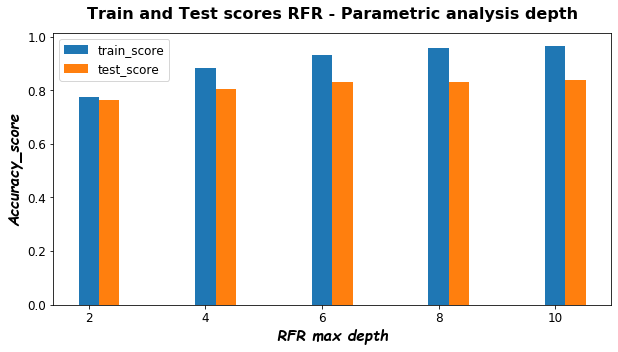

In [18]:
# Produce a plot with the score for the testing and training for the different max depths

width = 0.35          # the width of the bars

plt.figure(figsize=[10,5])
plt.bar(max_d_list, reg_score_train, width, label='train_score')
plt.bar(np.array(max_d_list) + width, reg_score_test, width, label='test_score')

plt.title('Train and Test scores RFR - Parametric analysis depth', size=16, weight='bold',y=1.03)

plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

label_prop = {'size':15,'weight':'bold','family':'fantasy','style':'oblique'}
plt.xlabel('RFR max depth',fontdict=label_prop)
plt.ylabel('Accuracy_score',fontdict=label_prop)


What do these results tell you about the effect of the depth of the trees on the performance of the model?

Basically, there's a compromise in the RFR performance with respect to tree depths. For the lowest depth, we see that both train and test scores are the lowest (both scores closed to each other). As soon as the depth is increased, both train and test scores increase, but the model began to overfit training data. We notice this given a more noticeable difference between train and test scores. Eventually, at the end, keeping increasing the tree depth does not report an increase in the accuracy score of test data (overfitting effect).

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

Basically, the depth of the tree determines the variance, thus if the model is trained with depth 1, the model suffers from a higher bias (meaning that the model is simpler but may produce lower variance predictions when applied beyond the training set).

On the other hand, with a maximum depth of 10, the model suffers from a higher variance, that is more complex and represents the training set more accurately but they may also represent a large noise component in the training set (overfitting).

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

I would apply a best-guess optimal model by choosing a maximum depth in the middle range (`max_depth = 5`) and performing a cross correlation such that I could make a good estimation about the accuracy of the model when test data is sampled accrossed the whole dataset.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

The dataset lacks a lot of explanations about what the data represents and more importantly, it lacks the year of properties construction. In addition, there are many features presented in a house that are not covered, such as land extension, ammenities and state of refurbishment. However, given the data provided, the RFR algorithm shows to be a robust predictor of the house prices with respect to the original dataset. Finally, definitely a collection of data obtained for an urban city like Boston could not be extrapolated to a rural city while expecting meaningful results.